# ML Combined Assignment -1

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
%matplotlib inline

In [64]:

df = pd.read_csv("nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [66]:
df.shape

(481, 31)

In [67]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [68]:
# Finding the null values
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [69]:
# Replacing the missing values
df['x3p.'].fillna(value = df['x3p.'].median(), inplace=True)
df['ft.'].fillna(value = df['ft.'].median(), inplace=True)

In [70]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             2
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            3
efg.            2
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [71]:
# Replacing the missing values
df['fg.'].fillna(value = df['fg.'].median(), inplace=True)
df['x2p.'].fillna(value = df['x2p.'].median(), inplace=True)
df['efg.'].fillna(value = df['efg.'].median(), inplace=True)

In [72]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [73]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [74]:
df['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [75]:
df['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [76]:
# Enabling one hot encoding for 'pos'
new_pos = pd.get_dummies(df['pos'],prefix='pos',drop_first=True)
new_pos

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
476,0,0,0,0,0,1
477,0,0,0,0,0,1
478,0,0,1,0,0,0
479,0,0,0,0,0,0


In [77]:
df.drop(columns='pos', axis=1, inplace=True)
df.head()

,player,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,23,TOT,63,0,847,66,141,0.468,4,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,20,OKC,81,20,1197,93,185,0.503,0,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,27,TOT,53,12,961,143,275,0.520,0,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,28,ORL,73,73,2552,464,1011,0.459,128,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,25,NOP,56,30,951,136,249,0.546,0,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [78]:
# Removing the unwanted columns
df.drop(columns=['player','bref_team_id', 'season','season_end'], axis=1, inplace=True)
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [79]:
df1 = pd.concat([df,new_pos], axis=1)

In [80]:
df1.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,0,0,0,0,0,0


In [83]:
df1.shape

(481, 32)

In [82]:
# Finding the X anfd Y values
X = df1.drop('pts', axis=1)
Y=df1['pts']

C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanat\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

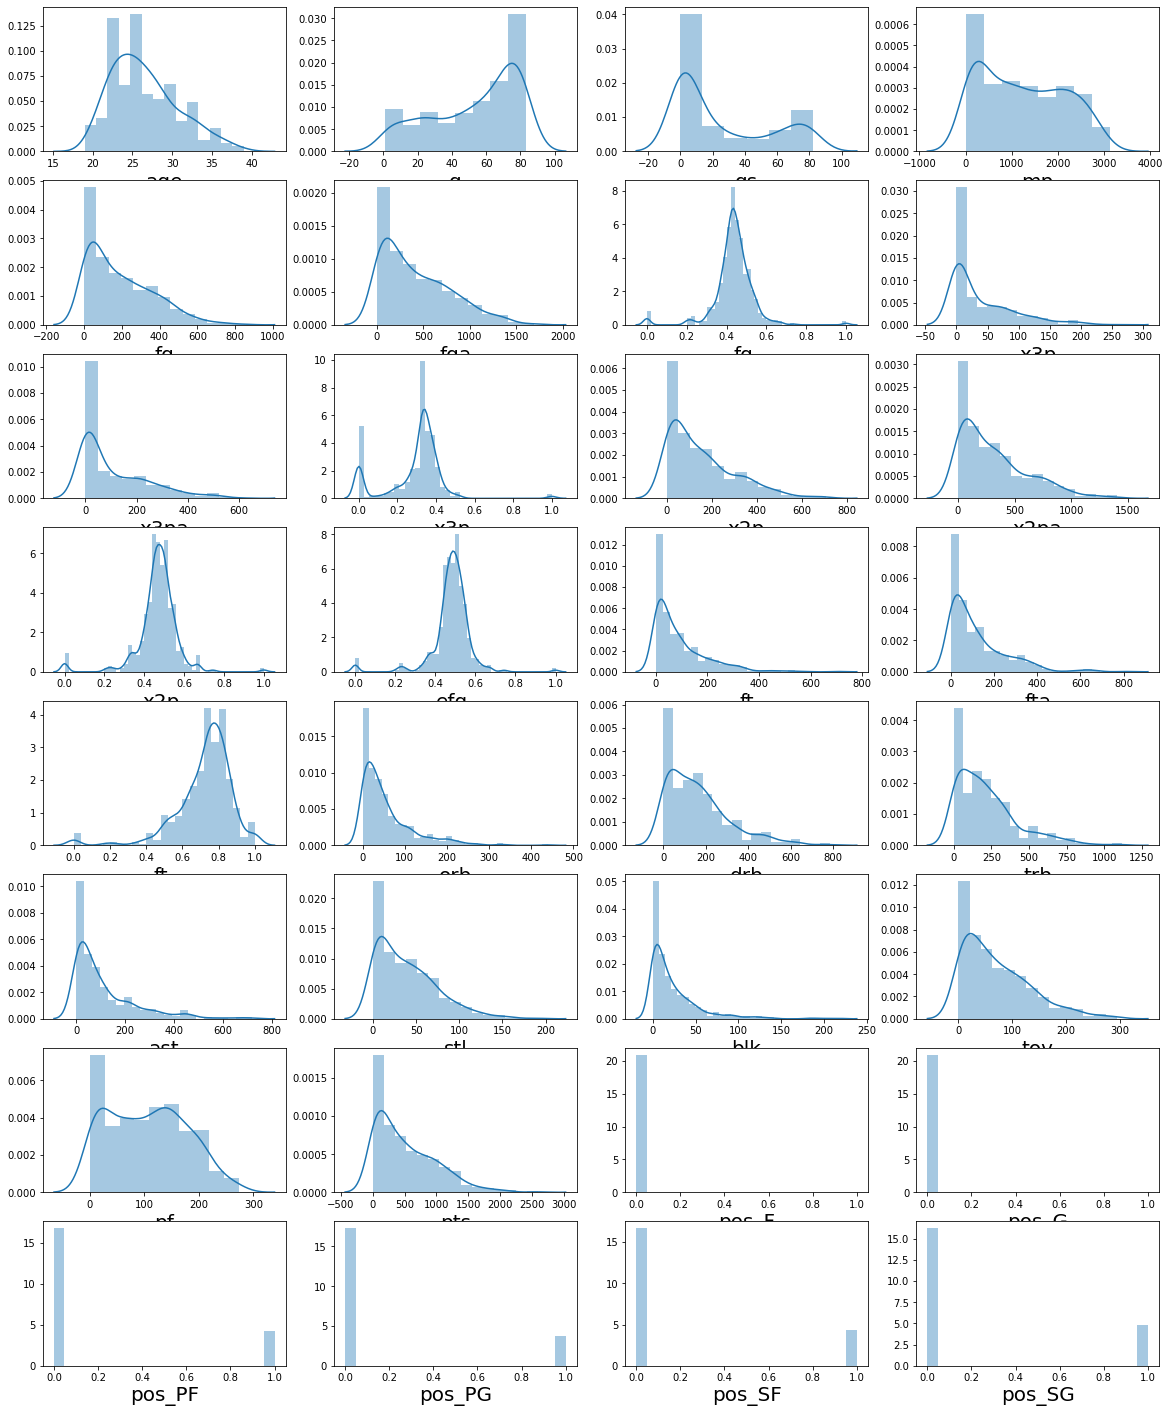

In [85]:
# Lets see how the data is distributed:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df1:
    if plotnumber <=32:
        plt.subplot(8,4, plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col, fontsize=20)
    plotnumber += 1
plt.show()

In [88]:
# To remove the variance in the dataset, Lets do scaling
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [98]:
# Splitting the X and Y for Training and Test dataset

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y, test_size= 0.25, random_state=355)

In [99]:
# Create the model
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [100]:
knn.score(X_test,Y_test)

0.01652892561983471

In [101]:
Y_pred = knn.predict(X_test)

In [104]:
# Finding the accuracy before Tuning the data:
print("The accuracy score is : ", accuracy_score(Y_test,Y_pred))

The accuracy score is :  0.01652892561983471


In [105]:
# Normalizing our model
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [107]:
x_train,x_test,y_train,y_test = train_test_split(X_norm,Y,test_size=0.25,random_state=355)

In [110]:
knr_norm = KNeighborsRegressor()
knr_norm.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
knr_norm.score(x_test,y_test)

In [113]:
Y_pred = knn.predict(X_test)
Y_pred

array([  12,  268,  715,  258,   65,   54,  915,    0,   36,   68,   73,
         18,  432, 1131,    0,  448, 1070,   86,    0,   20,  159,  499,
         99, 1241,  856,  588,  879,  257,    6,  273,  527,   68,  414,
        250,  527,   14,  144,  810,  588,  511,  630,   18,  200,  144,
        159,   66,  144,  338,   74,    9,   76,  511,    6,   68,  988,
        760,  781,  225,  347, 1047,  248,   26, 1118,  414,   28,    0,
        715,  715,    6,  573,   26,  810, 1249,  200,  511,  511,  760,
        483,   18,  916, 1089,  495,  760,  461,   76,   74,  525,  216,
        814,  132,  216,   28,  890,  144,  173, 1047,   68,   65,   20,
        164,    6,  216,   54,    0,  544,  988,  988,  214,  588,  630,
         44,  258,  216, 1417,  214,  630,  588,  929,  132,  159,  770],
      dtype=int64)

In [112]:
# Finding the accuracy before Tuning the data:
print("The accuracy score is : ", accuracy_score(Y_test,Y_pred))

The accuracy score is :  0.01652892561983471


In [115]:
y_new_pred = knr_norm.predict(x_test)

In [121]:
print(f'MSE:{mean_squared_error(y_test,y_new_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_new_pred))}')

MSE:59320.2694214876
RMSE:243.55752795076486


In [122]:
# Lets tune the data to increase the accuracy
# Tuning can be done with the help of "GridsearchCV"

In [123]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [124]:
# Intializing the GridsearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [125]:
gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


C:\Users\sanat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.028, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.028, total= 

[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.014, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.014, tota

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.014, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.000, total=   0.0s
[

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=12, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.028, total=   0.0s
[

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.000, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.014, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.028, total=   0.0s
[CV] a

[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.000, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.000, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.000, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.000, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   13.8s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [126]:
# Finding the best param for our model
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [127]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [128]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [129]:
Y_pred = knn.predict(X_test)

In [130]:
knn.score(X_test,Y_test)

0.024793388429752067

In [141]:
# K fold cross Validation
# Let's now use k-fold cross validation and check how well our model is generalizing over our dataset:
# We are randomly selecting our k to be 12 for k fold.
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


12

In [142]:
# Finding which feature contributes to  highest accuracy
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,Y_train)
    train_score_ = knn.score(X_train,Y_train)
    test_score_ =  knn.score(X_test,Y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.07954545454545454 and test score is :   0.0
for k =  2
train_score is :   0.07709750566893424 and test score is :   0.0
for k =  3
train_score is :   0.06575963718820861 and test score is :   0.0
for k =  4
train_score is :   0.07936507936507936 and test score is :   0.0
for k =  5
train_score is :   0.08390022675736962 and test score is :   0.025
for k =  6
train_score is :   0.06349206349206349 and test score is :   0.05
for k =  7
train_score is :   0.07256235827664399 and test score is :   0.025
for k =  8
train_score is :   0.08163265306122448 and test score is :   0.0
for k =  9
train_score is :   0.07256235827664399 and test score is :   0.025
for k =  10
train_score is :   0.07256235827664399 and test score is :   0.0
for k =  11
train_score is :   0.07709750566893424 and test score is :   0.0
for k =  12
train_score is :   0.06802721088435375 and test score is :   0.05
************************************************
****************************

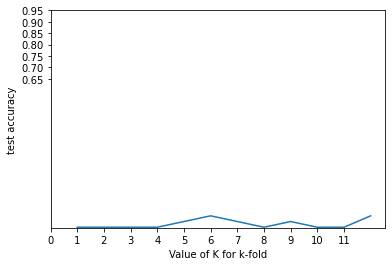

In [144]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 
plt.show()